#  Experiment 12
## Dhruv Singhal || 500075346 || R177219074 || AIML || Sem5
## Support Vector Machines

### Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Creating Data
Creating Dataset with 5000 sample points and 2 features and 2 classes and number of informative features are 2 and number of redundant features are 0 and number of repeated features are 0 and random_state is 50 and difference between 2 class is set as 3.5

In [2]:
X, y= make_classification(n_samples=5000,n_features=2,n_classes=2
                          ,n_informative=2,n_redundant=0,n_repeated=0,random_state=0,class_sep=2.5)

### Preprocessing & Visualization
since we have created dataset using make_classfiocation , it by default make dataset's mean tending to 0 and Standard Deviation to 1 which doesn't require any preprocessing.



### Model Building
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. 
In this case we have called the in built function svm.SVC

### Compile & Train
Firstly splitting the input dataset into training and test parts following which training set is passed through svm.SVC and is fitted to it.
and predicting over the test test to check the model performance. 

train Accuracy: 0.99675
test Accuracy: 0.996


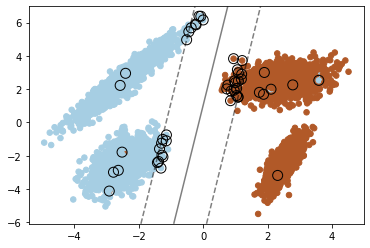

In [3]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=42)
clf = svm.SVC(kernel="linear", C=10)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
print("train Accuracy:",clf.score(X_train,Y_train))
print("test Accuracy:",clf.score(X_test,Y_test))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


# plot the decision function

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.show()

###  Result
since training is giving 99.67% accuracy and in testing it is giving 99.60% accuracy so to check if model is overfitting or not or to improve the validation accuracy more and make more generalized model . So to overcome this we are using k fold cross validation and hyperparameter tuning to improve the overall score and generate generalizesd model and knowing which hyperparameter combination  gives best overall score

In [4]:
#Cross Validation without Hyper parameter Tuning
clf = svm.SVC(kernel='linear', C=2)
kf=KFold(n_splits=70)
score=cross_val_score(clf, X, y, cv=kf)
print("Average Cross Validation score ( Accuracy) :{}".format(score.mean()))

Average Cross Validation score ( Accuracy) :0.9965906550413592


In [5]:
# Hyper parameter tuning on SVM
tuned_parameters = [{'kernel':["linear"], 'C':[100,10,20,40,50]},
                    {'kernel':["rbf"], 'C':[90,40,50,100,90]},
                
                    ]
clf=GridSearchCV(svm.SVC(),tuned_parameters,scoring=('accuracy'))
clf.fit(X,y)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Best Score:",clf.best_score_)

Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

Best Score: 0.9966000000000002


In [6]:
#%% kfold cross validation with hyperparameter tuning
k = 5
kf = KFold(n_splits=k, random_state=None)
model = GridSearchCV(svm.SVC(),tuned_parameters,scoring=('accuracy'))
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
print("Best parameters set found on development set:")
print()
print(model.best_params_)
print()
print("Best Score:",model.best_score_)

Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

Best Score: 0.9964999999999999


Now the overall score is 99.649% accuracy 